## EDA - Exploratory Data Analysis using Scikit-Learn Diabetes dataset, in attempt to provide a solution that will assist physicians during their patient screening exercise.



In [124]:
import pandas as pd
import seaborn as sns

from matplotlib import pyplot as plt
import numpy as np
from typing import List
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

from sklearn.datasets import load_diabetes

diaData = load_diabetes()

X = diaData.data
y = diaData.target


df = pd.DataFrame(data=diaData.data, columns=diaData.feature_names)
df['target'] = diaData.target


### Dataset Statistics, Histograms and Correlation Matrix

Below we display the following statistics for our dataset

* Total Count of values

* Mean average of the values

* Standard Deviation

* 1st, 2nd(Median) and 3rd Quartile( representing 25%, 50% and 75% of the data respectively)

* Minimum and Maximum values in the dataset

Also find below and histogram for all the data features and a correlation matrix plotted with a heatmap


 
 Data Stats: 
                 age           sex           bmi            bp            s1   
count  4.420000e+02  4.420000e+02  4.420000e+02  4.420000e+02  4.420000e+02  \
mean  -2.511817e-19  1.230790e-17 -2.245564e-16 -4.797570e-17 -1.381499e-17   
std    4.761905e-02  4.761905e-02  4.761905e-02  4.761905e-02  4.761905e-02   
min   -1.072256e-01 -4.464164e-02 -9.027530e-02 -1.123988e-01 -1.267807e-01   
25%   -3.729927e-02 -4.464164e-02 -3.422907e-02 -3.665608e-02 -3.424784e-02   
50%    5.383060e-03 -4.464164e-02 -7.283766e-03 -5.670422e-03 -4.320866e-03   
75%    3.807591e-02  5.068012e-02  3.124802e-02  3.564379e-02  2.835801e-02   
max    1.107267e-01  5.068012e-02  1.705552e-01  1.320436e-01  1.539137e-01   

                 s2            s3            s4            s5            s6   
count  4.420000e+02  4.420000e+02  4.420000e+02  4.420000e+02  4.420000e+02  \
mean   3.918434e-17 -5.777179e-18 -9.042540e-18  9.293722e-17  1.130318e-17   
std    4.761905e-02  4.761905e-02

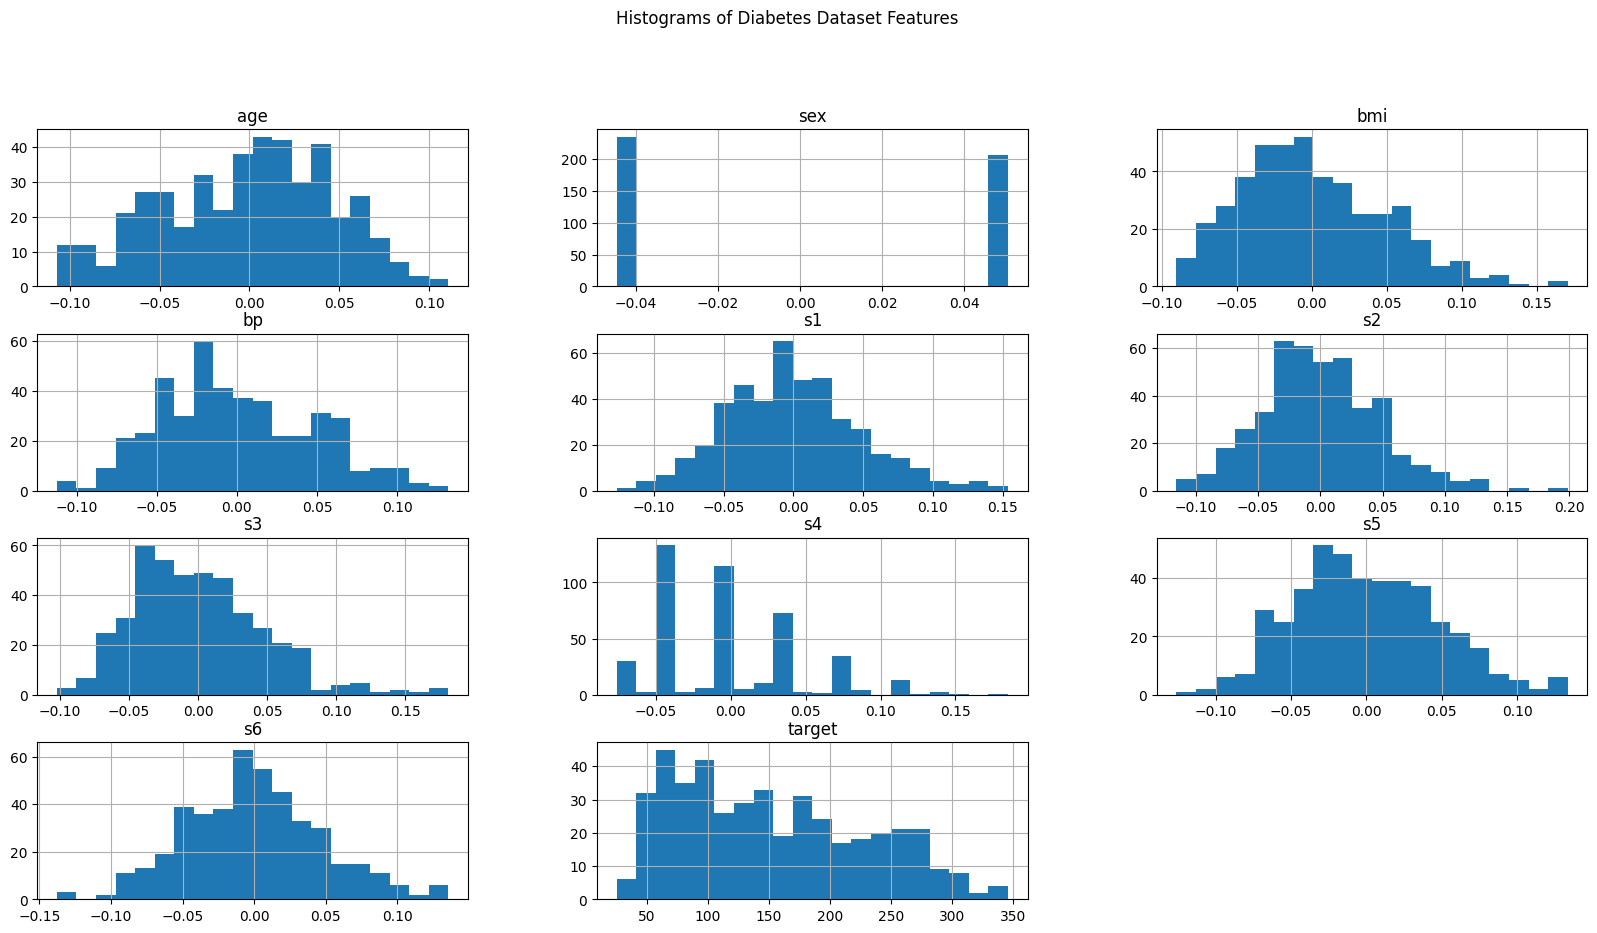

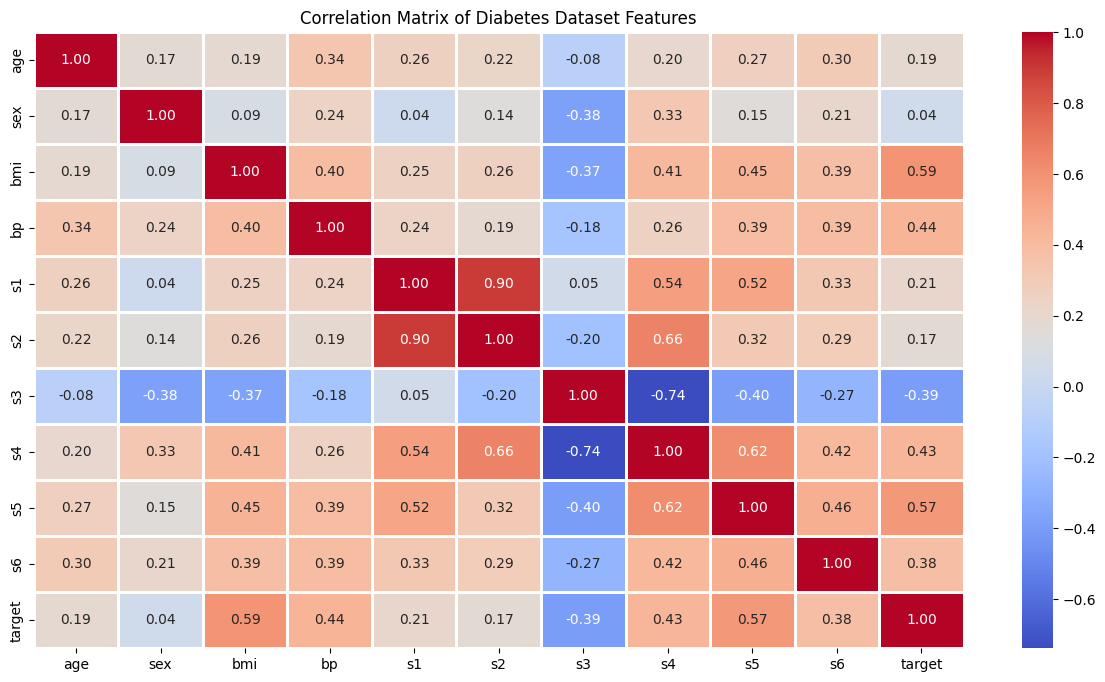

In [126]:
    
statistics = df.describe()
print(f"\n \n Data Stats: \n {statistics}")

df.hist(bins=20, figsize=(20, 10))
plt.suptitle("Histograms of Diabetes Dataset Features", y=1)
plt.show()


correlation_matrix = df.corr()

# print(correlation_matrix)


plt.figure(figsize=(15, 8))

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=1)
plt.title("Correlation Matrix of Diabetes Dataset Features")
plt.show()


### Checks to see if there is a need for data clean up

 1. Checking for duplicate input
 2. Checking for missing data

In [128]:

# checking for dupicate rows in the dataset
for index, row in df.iterrows():
    isDuplicate = df.duplicated(subset=row.index).any()
    if isDuplicate:
        print(f"Row at index {index} is a duplicate.")
    else:
        continue
        # print(f"Row at index {index} is not a duplicate.")

#  checking for missing values in the dataset
for column in df.columns:
    missingCount = df[column].isnull().sum()
    if missingCount > 0:
        print(f"Column '{column}' has {missingCount} missing values.")
    else:
        continue
        # print(f"Column '{column}' has no missing values.")



Based on the checks done above, the data does not require clean up

### Data Split (70-15-15)

Below, we split the dataset into 3 parts to train, validate and test our models. The data is split  as follows:

Training(70% of total dataset) - This will be used to training our models, 

Validate(15% of total dataset / 50% of the 30% after removing training data) -  This will be use to validate the functionality our models after training,

Test(Remaining 15% after deduction of he training and vaidation data) - This will be used to test the performance of our models after validation.

In [143]:
X = df[['bmi']].values
y = df['target'].values

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# print("Train set size:", len(X_train))
# print("Validation set size:", len(X_val))
# print("Test set size:", len(X_test))

With a total data-set of 442 entries, we have split the data into 3 parts

Training data - 309

Validation data - 66

Test data - 67


### Next we plot a polynomial regression on the BMI feature against the "disease progression one year after baseline" - from degree 0 to 5

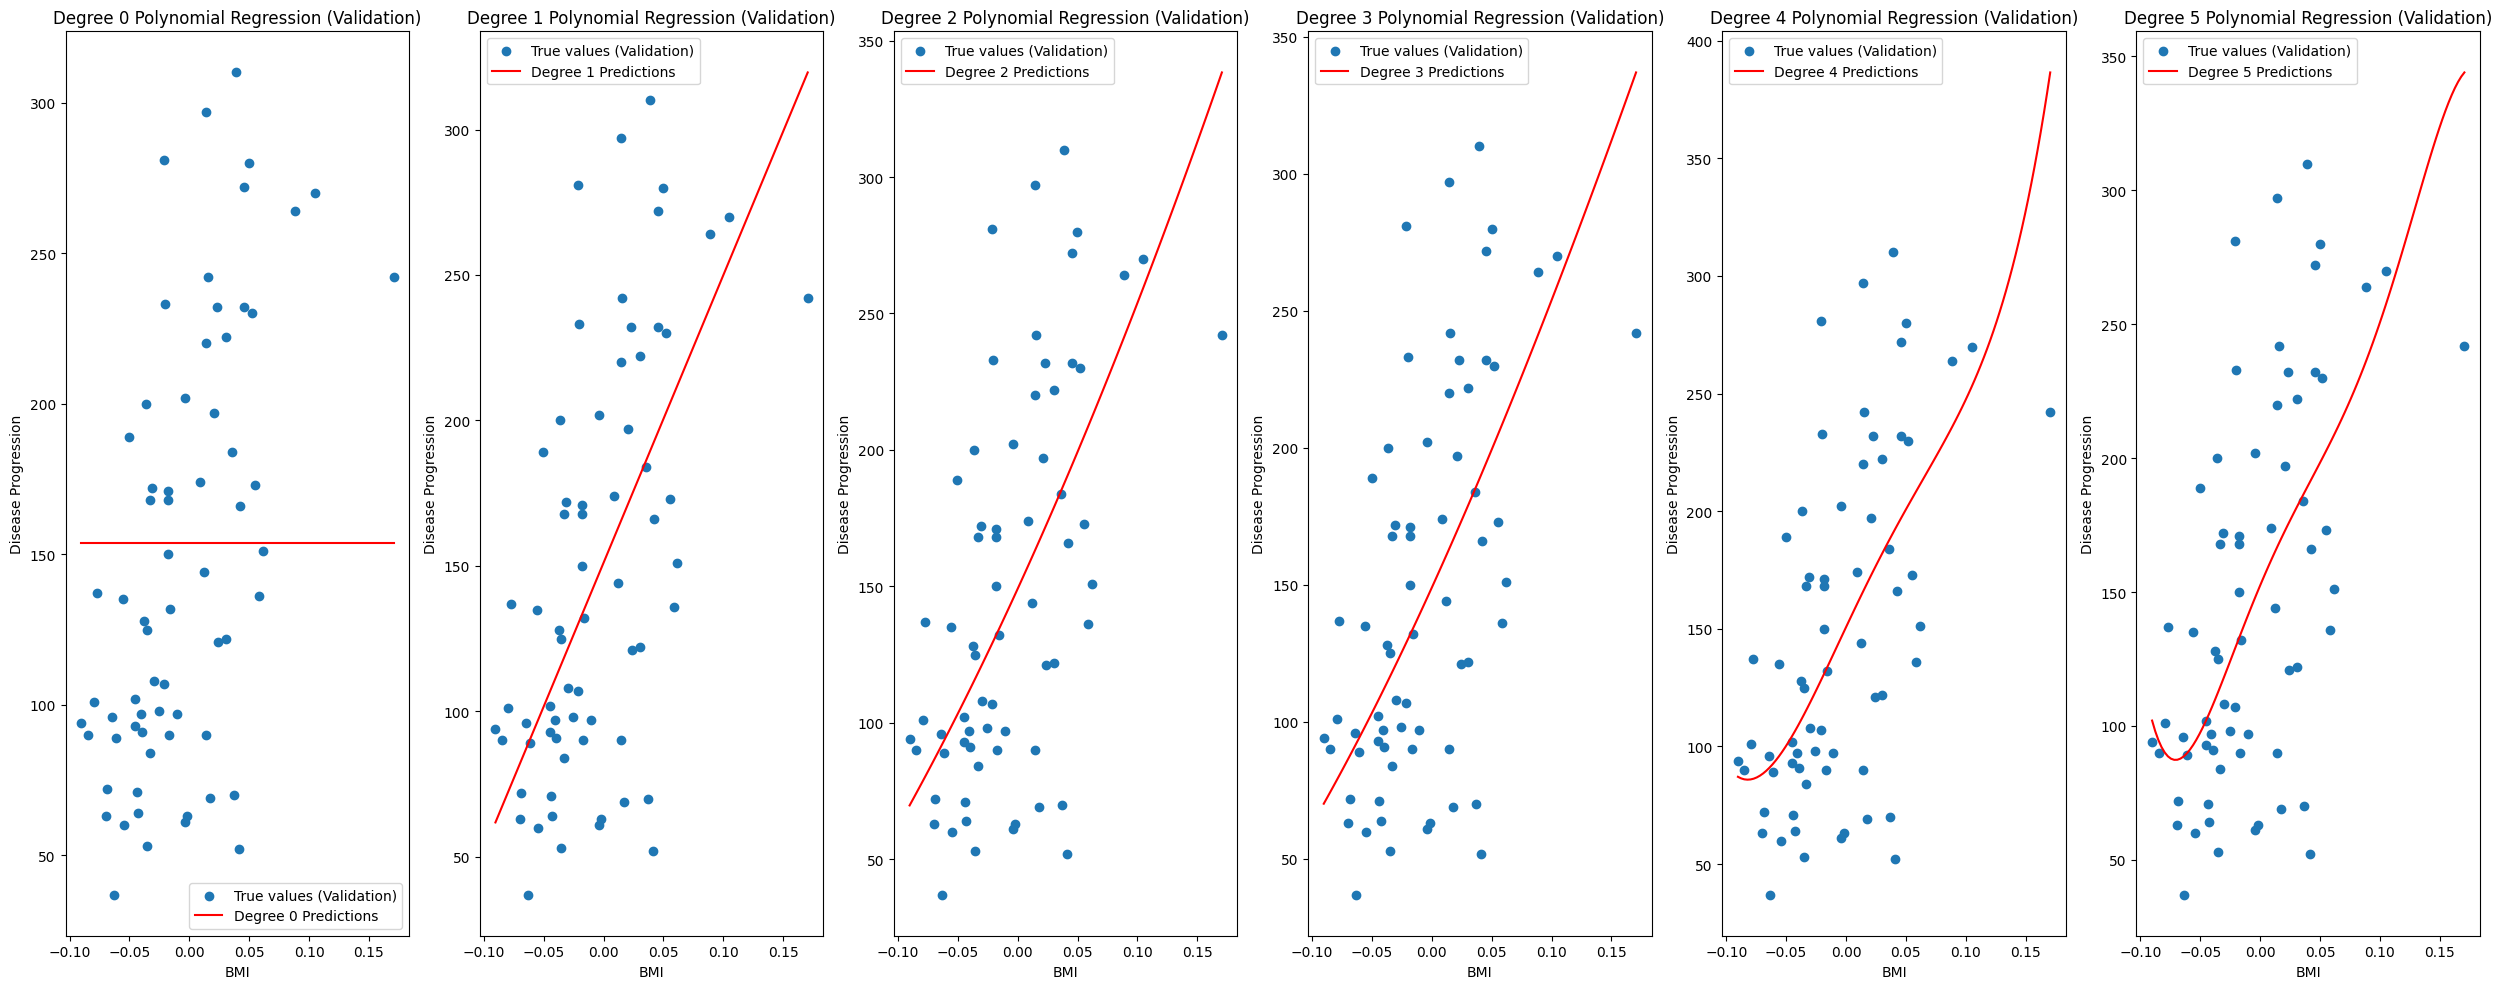

Degree 0 - Train Error: 6148.28, Validation Error: 5155.02, Test Error: 5706.61
Degree 1 - Train Error: 3899.45, Validation Error: 3566.67, Test Error: 4198.45
Degree 2 - Train Error: 3892.86, Validation Error: 3598.99, Test Error: 4207.00
Degree 3 - Train Error: 3892.85, Validation Error: 3594.94, Test Error: 4206.39
Degree 4 - Train Error: 3881.63, Validation Error: 3767.90, Test Error: 4156.27
Degree 5 - Train Error: 3875.42, Validation Error: 3592.07, Test Error: 4159.44


In [82]:

degrees = np.arange(6)
train_errors = []
val_errors = []
test_errors = []

plt.figure(figsize=(25, 10))


for degree in degrees:
    poly = PolynomialFeatures(degree=degree)
    X_train_poly = poly.fit_transform(X_train)
    X_val_poly = poly.transform(X_val)
    X_test_poly = poly.transform(X_test)

    model = LinearRegression()
    model.fit(X_train_poly, y_train)

    X_range = np.linspace(min(X_val), max(X_val), 100).reshape(-1, 1)
    X_range_poly = poly.transform(X_range)

    y_val_pred = model.predict(X_val_poly)
    y_test_pred = model.predict(X_test_poly)
    y_range_pred = model.predict(X_range_poly)

    plt.subplot(1, 6, degree + 1) 
    plt.scatter(X_val, y_val, label='True values (Validation)')
    plt.plot(X_range, y_range_pred, label=f'Degree {degree} Predictions', color='red')
    plt.title(f'Degree {degree} Polynomial Regression (Validation)')
    plt.xlabel('BMI')
    plt.ylabel('Disease Progression')
    plt.legend()

    train_error = mean_squared_error(y_train, model.predict(X_train_poly))
    val_error = mean_squared_error(y_val, y_val_pred)
    test_error = mean_squared_error(y_test, y_test_pred)

    train_errors.append(train_error)
    val_errors.append(val_error)
    test_errors.append(test_error)

plt.tight_layout()
plt.show()

# for degree, train_error, val_error, test_error in zip(degrees, train_errors, val_errors, test_errors):
#     print(f'Degree {degree} - Train Error: {train_error:.2f}, Validation Error: {val_error:.2f}, Test Error: {test_error:.2f}')



### Comparing all models using the training and validation data

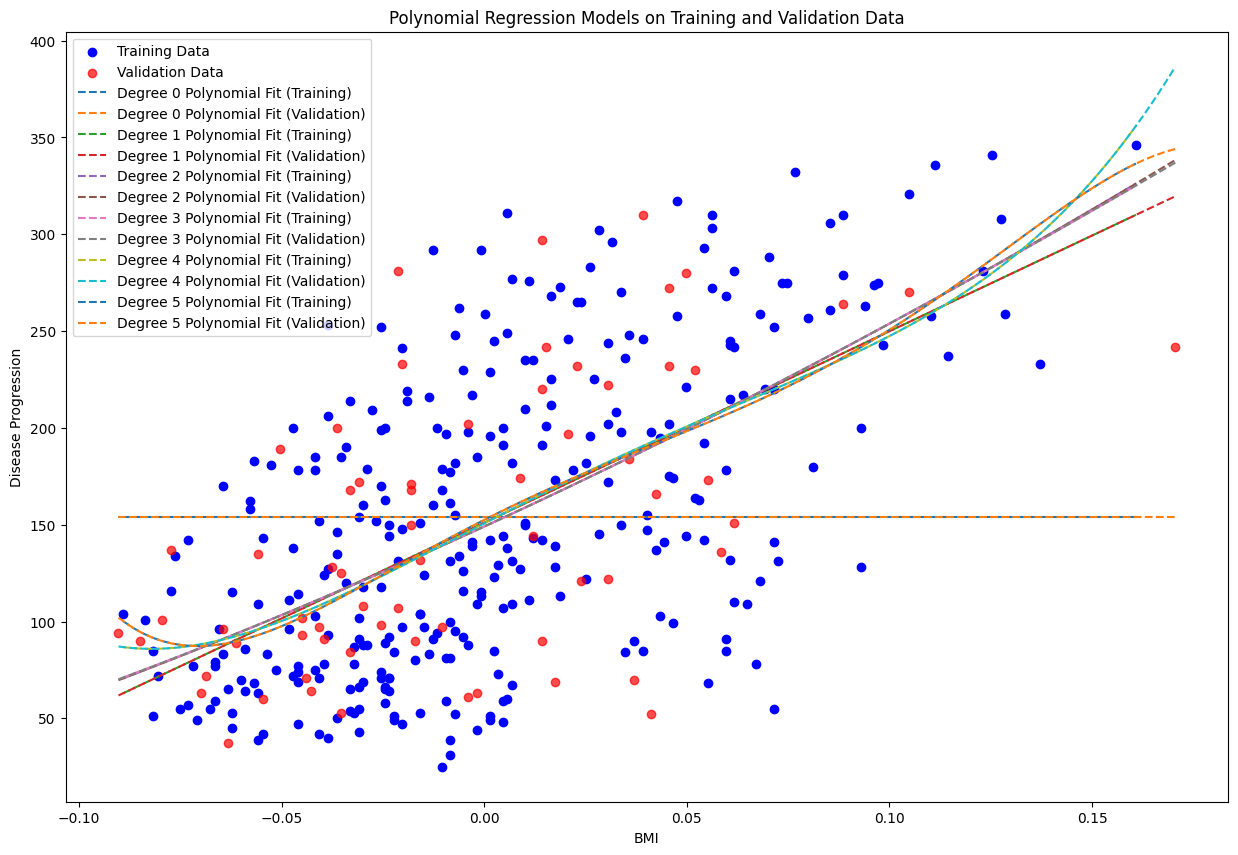

In [144]:
degrees = np.arange(6)

plt.figure(figsize=(15, 10))

plt.scatter(X_train, y_train, label='Training Data', color='blue')

plt.scatter(X_val, y_val, label='Validation Data', color='red', alpha=0.7)

for degree in degrees:
    poly = PolynomialFeatures(degree=degree)
    X_train_poly = poly.fit_transform(X_train)
    X_val_poly = poly.transform(X_val)

    model = LinearRegression()
    model.fit(X_train_poly, y_train)

    X_range_train = np.linspace(min(X_train), max(X_train), 100).reshape(-1, 1)
    X_range_val = np.linspace(min(X_val), max(X_val), 100).reshape(-1, 1)
    X_range_train_poly = poly.transform(X_range_train)
    X_range_val_poly = poly.transform(X_range_val)

    y_range_train_pred = model.predict(X_range_train_poly)
    y_range_val_pred = model.predict(X_range_val_poly)

    plt.plot(X_range_train, y_range_train_pred, label=f'Degree {degree} Polynomial Fit (Training)', linestyle='dashed')
    plt.plot(X_range_val, y_range_val_pred, label=f'Degree {degree} Polynomial Fit (Validation)', linestyle='dashed')

plt.title('Polynomial Regression Models on Training and Validation Data')
plt.xlabel('BMI')
plt.ylabel('Disease Progression')
plt.legend()
plt.show()

Below we computing the R-squared, Mean Absolute Percentage Error and Mean Absolute Error to highlight the performance of our models

In [154]:
degrees = np.arange(6)

# Store metrics for each degree
r2_scores = []
mape_scores = []
mae_scores = []

for degree in degrees:
    poly = PolynomialFeatures(degree=degree)
    X_train_poly = poly.fit_transform(X_train)
    X_val_poly = poly.transform(X_val)

    model = LinearRegression()
    model.fit(X_train_poly, y_train)

    y_val_pred = model.predict(X_val_poly)

    r2 = r2_score(y_val, y_val_pred)
    r2_scores.append(r2)

    mape = np.mean(np.abs((y_val - y_val_pred) / y_val)) * 100
    mape_scores.append(mape)

    mae = mean_absolute_error(y_val, y_val_pred)
    mae_scores.append(mae)

result_df = pd.DataFrame({
    'Degree': degrees,
    'R-squared': r2_scores,
    'MAPE': mape_scores,
    'MAE': mae_scores
})

# print(result_df)

   Degree  R-squared       MAPE        MAE
0       0  -0.008055  57.957748  62.042954
1       1   0.302543  42.045613  48.270702
2       2   0.296223  41.902435  48.273028
3       3   0.297015  41.877452  48.235127
4       4   0.263194  41.483629  48.367440
5       5   0.297578  40.737582  47.348851


The follow table describes the interceps, Mean Square Error, Mean Absolute Error

| Degree(model)    | R-Squared | Mean Absolute Percentage Error | Mean Absolute Error
| -------- | ------- | ------ | -----
| 0  | -0.008055  | 57.957748 | 62.042954
| 1 | 0.302543  | 42.045613 | 48.270702
| 2  |  0.296223 | 41.902435 | 48.273028
| 3  |  0.297015 | 41.877452 | 48.235127
| 4  |  0.263194 | 41.483629 | 48.367440
| 5  |  0.297578 | 40.737582 | 47.348851



Above we mesured the R-Squared, MAPE and MAE values for all 6 models and the results as shown. Our model Degree 1 shows an R-Squared value of 0.3 which is the closest postive value to +1, signifying that the model is 30% close to perfect compared to the other models given that a value of +1 signifies a 100% perfect model. The RSquared value is measured within a range of -1 to +1

R-Squared  0 to +1 = Good model

R-Squared  0 to -1 = Bad model

R-Squared  0 = Equivalent to a niave model 


### Below we will run the chosen model (Degree 1) against our test data-set

In [159]:
poly = PolynomialFeatures(degree=1)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

model = LinearRegression()
model.fit(X_train_poly, y_train)

y_test_pred = model.predict(X_test_poly)

r2_test = r2_score(y_test, y_test_pred)

mse_test = mean_squared_error(y_test, y_test_pred)

mae_test = mean_absolute_error(y_test, y_test_pred)

# print(f"Degree 1 Model on Test Set:")
# print(f"R-squared: {r2_test:.4f}")
# print(f"MSE: {mse_test:.4f}")
# print(f"MAE: {mae_test:.4f}")

### A graph plot of the training, validation and test datapoints, and the fit of my chosen model(Degree 1) over each of them

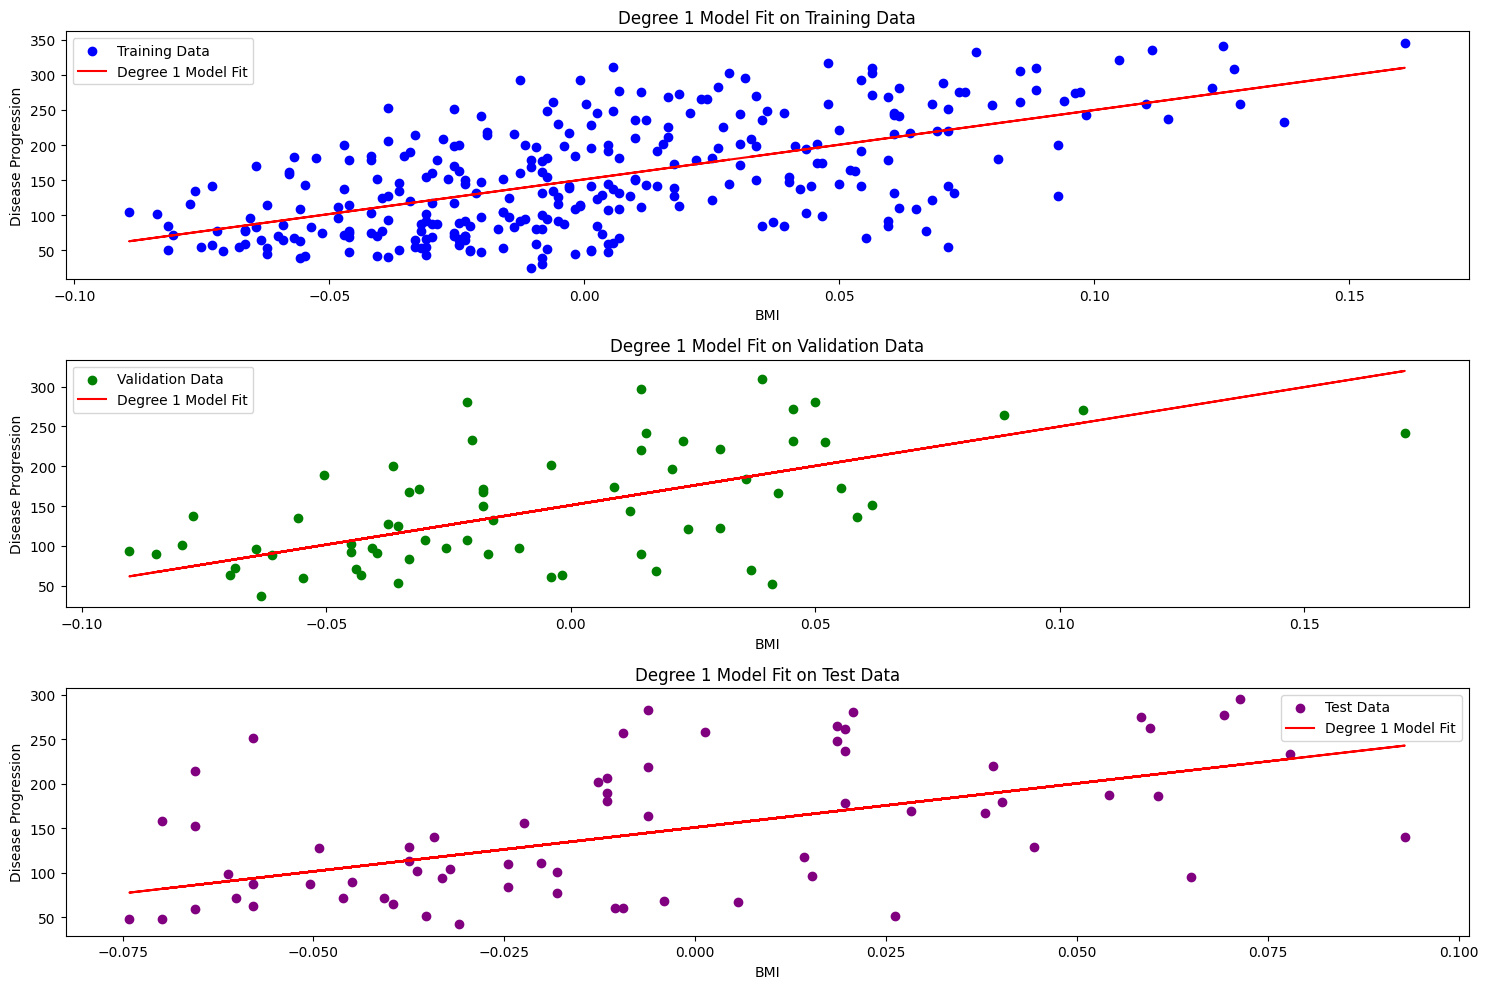

In [145]:
poly = PolynomialFeatures(degree=1)
X_train_poly = poly.fit_transform(X_train)
X_val_poly = poly.transform(X_val)
X_test_poly = poly.transform(X_test)

model = LinearRegression()
model.fit(X_train_poly, y_train)

y_train_pred = model.predict(X_train_poly)
y_val_pred = model.predict(X_val_poly)
y_test_pred = model.predict(X_test_poly)

plt.figure(figsize=(15, 10))

plt.subplot(3, 1, 1)
plt.scatter(X_train, y_train, label='Training Data', color='blue')
plt.plot(X_train, y_train_pred, label='Degree 1 Model Fit', color='red')
plt.title('Degree 1 Model Fit on Training Data')
plt.xlabel('BMI')
plt.ylabel('Disease Progression')
plt.legend()

plt.subplot(3, 1, 2)
plt.scatter(X_val, y_val, label='Validation Data', color='green')
plt.plot(X_val, y_val_pred, label='Degree 1 Model Fit', color='red')
plt.title('Degree 1 Model Fit on Validation Data')
plt.xlabel('BMI')
plt.ylabel('Disease Progression')
plt.legend()

plt.subplot(3, 1, 3)
plt.scatter(X_test, y_test, label='Test Data', color='purple')
plt.plot(X_test, y_test_pred, label='Degree 1 Model Fit', color='red')
plt.title('Degree 1 Model Fit on Test Data')
plt.xlabel('BMI')
plt.ylabel('Disease Progression')
plt.legend()

plt.tight_layout()
plt.show()

In [161]:

bmiValue = df.loc[2, 'bmi']


model = LinearRegression()
model.fit(X_train.reshape(-1, 1), y_train)

intercept = model.intercept_
slope = model.coef_[0]

# print(round(intercept, 2))
# print(round(slope, 2))
# print(round(bmiValue, 2))

result = 151.04 + 988.42 * 0.04
print(f"\nManually Computed Result: {result:.2f}")

expectedPrediction = model.predict(np.array([[0.04]]))[0]

print(f"Result Computed using the model's predict method: {expectedPrediction:.2f}")



Manually Computed Result: 190.58
Result Computed using the model's predict method: 190.58


### Equation for the Degree 1 model:

y = b0 + b1 * x

Where: 

y = predicted Value

b0 = intercept

b1 = coefficent of the feature x

x = feature value (BMI)

y = 151.04 + 988.42 x 0.04

y = 190.5768

y = 190.58 (Approximately)

Using the model.predict() function we  arrive at thesame value as seen in the code snippet above



In [162]:

for degree in degrees:
    poly = PolynomialFeatures(degree=degree)
    X_poly = poly.fit_transform(X_train)

    feature_names = poly.get_feature_names_out()

    num_features = len(feature_names)

    num_parameters = X_poly.shape[1]

    # print(f"Degree {degree} Polynomial:")
    # print(f"Number of Features: {num_features}")
    # print(f"Number of Trainable Parameters: {num_parameters}")
